In [40]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)

In [35]:
broken_df = pd.read_csv('cyclist.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 15: invalid continuation byte

In [13]:
broken_df[:3]

,Date,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
0,01/01/2012,35,NaN,0,38,51,26,10,16,NaN
1,02/01/2012,83,NaN,1,68,153,53,6,43,NaN
2,03/01/2012,135,NaN,2,104,248,89,3,58,NaN


In [26]:
fixed_df = pd.read_csv('cyclist.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col=['Date'])

/home/gr4vy/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


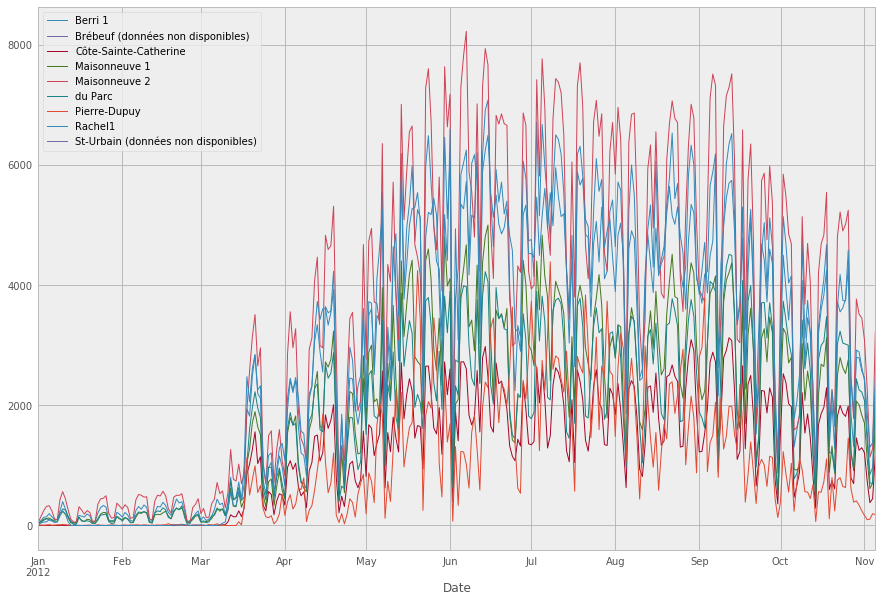

In [42]:
fixed_df.plot(figsize=(15,10))

# Commuters or for-fun?

In [43]:
berri_path = fixed_df[['Berri 1']].copy()

In [45]:
berri_path[:5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


In [46]:
berri_path.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

In [48]:
berri_path.loc[:, 'Weekday'] = berri_path.index.weekday

In [49]:
berri_path[:5]

,Berri 1,Weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


In [50]:
weekday_counts = berri_path.groupby('Weekday').aggregate(sum)

/home/gr4vy/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


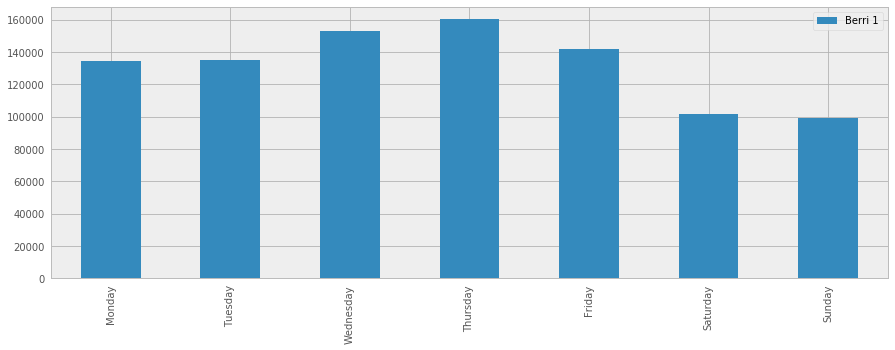

In [53]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind='bar')